In [1]:
import cv2
import torch
import numpy as np

cap = cv2.VideoCapture('/home/louis/Documents/gatech/Summer2023/Multimodal-Deep-Regression/data/video_packs/video_pack_1000/7117343959055191302.mp4')

frames = []
frame_count = 0

while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frame = cv2.resize(frame, (72, 128))  
    frame = frame.transpose((2, 0, 1)) 
    frames.append(frame)
    frame_count += 1
    if frame_count >= 5:
        break

cap.release()

#frames = [np.array(frame)/255 for frame in frames]  # Normalizing data
frames = np.stack(frames)  
frames = np.transpose(frames, (1, 0, 2, 3))  
input_data = input_data.unsqueeze(0) 
input_data.size()

torch.Size([1, 3, 5, 128, 72])

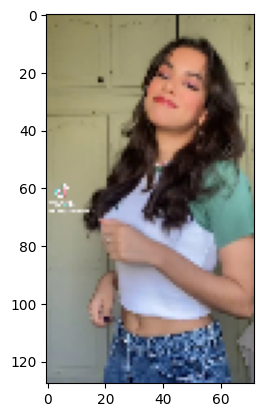

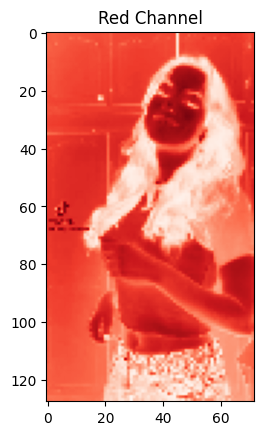

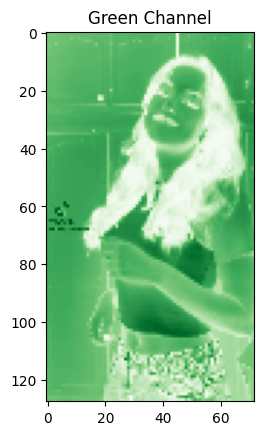

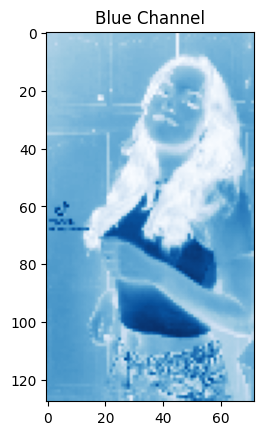

In [2]:
import matplotlib.pyplot as plt

# select the video & frame
video = 1
frame = 3

# select a frame
image_tensor = input_data[0] [:,frame,:,:]
numpy_image = image_tensor.detach().numpy()

# imshow (Height, Width, Channels)
numpy_image = numpy_image.transpose((1, 2, 0))

# normalize to 0,1
numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

plt.imshow(numpy_image)
plt.show()

# Red channel
plt.imshow(numpy_image[:,:,0], cmap='Reds')
plt.title("Red Channel")
plt.show()

# Green channel
plt.imshow(numpy_image[:,:,1], cmap='Greens')
plt.title("Green Channel")
plt.show()

# Blue channel
plt.imshow(numpy_image[:,:,2], cmap='Blues')
plt.title("Blue Channel")
plt.show()

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import os
import random
import time

# Create Batches with DataLoaders
batch_size = 1
train_loader = list(zip(input_data, input_data)) #TensorDataset(x_train, y_train)
train_loader = DataLoader(train_loader, batch_size=batch_size, shuffle=True)

In [4]:
# This need to same as the main & preprocess
frames_to_skip=200 # how many frame to skip, reduce depth
shrink=8 # shrink H x W, the higher the smaller scale
normalize=True # normalize the pixel to 0 to 1

In [5]:
H = 1024//shrink
W = 576//shrink
H,W

(128, 72)

In [6]:
import torch
import matplotlib.pyplot as plt

def check():
    outputs = model(input_data.to(torch.float32))

    # select a frame
    image_tensor = outputs.squeeze()[:,3,:,:]
    numpy_image = image_tensor.detach().numpy()

    # imshow (Height, Width, Channels)
    numpy_image = numpy_image.transpose((1, 2, 0))

    # normalize to 0,1
    numpy_image = (numpy_image - numpy_image.min()) / (numpy_image.max() - numpy_image.min())

    plt.imshow(numpy_image)
    plt.show()

Total parameters: 1,041,859
First epoch took 0.0 minutes.
Epoch 1/100, Train_Loss: 0.04, Avg: 0.04
Epoch 2/100, Train_Loss: 0.04, Avg: 0.04
Epoch 3/100, Train_Loss: 0.04, Avg: 0.04
Epoch 4/100, Train_Loss: 0.04, Avg: 0.04
Epoch 5/100, Train_Loss: 0.04, Avg: 0.04
Epoch 6/100, Train_Loss: 0.04, Avg: 0.04
Epoch 7/100, Train_Loss: 0.04, Avg: 0.04
Epoch 8/100, Train_Loss: 0.04, Avg: 0.04
Epoch 9/100, Train_Loss: 0.04, Avg: 0.04
Epoch 10/100, Train_Loss: 0.04, Avg: 0.04


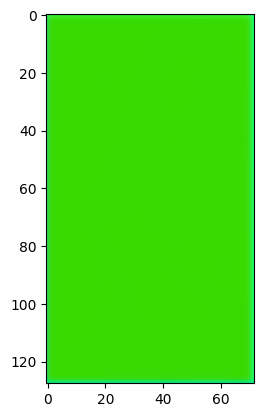

Epoch 11/100, Train_Loss: 0.04, Avg: 0.04
Epoch 12/100, Train_Loss: 0.04, Avg: 0.04
Epoch 13/100, Train_Loss: 0.04, Avg: 0.04
Epoch 14/100, Train_Loss: 0.04, Avg: 0.04
Epoch 15/100, Train_Loss: 0.04, Avg: 0.04
Epoch 16/100, Train_Loss: 0.04, Avg: 0.04
Epoch 17/100, Train_Loss: 0.04, Avg: 0.04
Epoch 18/100, Train_Loss: 0.04, Avg: 0.04
Epoch 19/100, Train_Loss: 0.04, Avg: 0.04
Epoch 20/100, Train_Loss: 0.04, Avg: 0.04


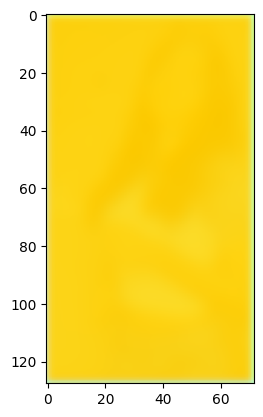

Epoch 21/100, Train_Loss: 0.04, Avg: 0.04
Epoch 22/100, Train_Loss: 0.04, Avg: 0.04
Epoch 23/100, Train_Loss: 0.04, Avg: 0.04
Epoch 24/100, Train_Loss: 0.04, Avg: 0.04
Epoch 25/100, Train_Loss: 0.04, Avg: 0.04
Epoch 26/100, Train_Loss: 0.04, Avg: 0.04
Epoch 27/100, Train_Loss: 0.04, Avg: 0.04
Epoch 28/100, Train_Loss: 0.04, Avg: 0.04
Epoch 29/100, Train_Loss: 0.04, Avg: 0.04
Epoch 30/100, Train_Loss: 0.04, Avg: 0.04


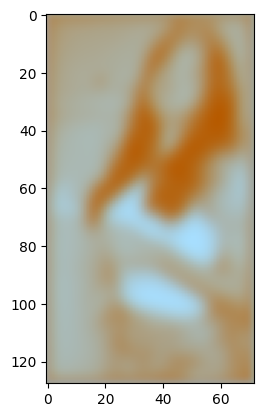

Epoch 31/100, Train_Loss: 0.04, Avg: 0.04
Epoch 32/100, Train_Loss: 0.04, Avg: 0.04
Epoch 33/100, Train_Loss: 0.03, Avg: 0.03
Epoch 34/100, Train_Loss: 0.03, Avg: 0.03
Epoch 35/100, Train_Loss: 0.03, Avg: 0.03
Epoch 36/100, Train_Loss: 0.03, Avg: 0.03
Epoch 37/100, Train_Loss: 0.03, Avg: 0.03
Epoch 38/100, Train_Loss: 0.03, Avg: 0.03
Epoch 39/100, Train_Loss: 0.03, Avg: 0.03
Epoch 40/100, Train_Loss: 0.03, Avg: 0.03


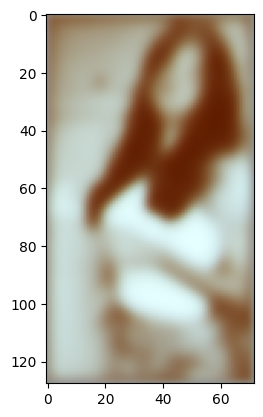

Epoch 41/100, Train_Loss: 0.03, Avg: 0.03
Epoch 42/100, Train_Loss: 0.03, Avg: 0.03
Epoch 43/100, Train_Loss: 0.03, Avg: 0.03
Epoch 44/100, Train_Loss: 0.03, Avg: 0.03
Epoch 45/100, Train_Loss: 0.03, Avg: 0.03
Epoch 46/100, Train_Loss: 0.03, Avg: 0.03
Epoch 47/100, Train_Loss: 0.03, Avg: 0.03
Epoch 48/100, Train_Loss: 0.03, Avg: 0.03
Epoch 49/100, Train_Loss: 0.03, Avg: 0.03
Epoch 50/100, Train_Loss: 0.03, Avg: 0.03


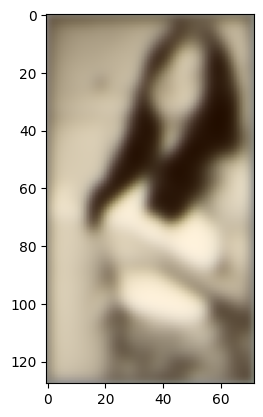

Epoch 51/100, Train_Loss: 0.03, Avg: 0.03
Epoch 52/100, Train_Loss: 0.02, Avg: 0.02
Epoch 53/100, Train_Loss: 0.02, Avg: 0.02
Epoch 54/100, Train_Loss: 0.02, Avg: 0.02
Epoch 55/100, Train_Loss: 0.02, Avg: 0.02
Epoch 56/100, Train_Loss: 0.02, Avg: 0.02
Epoch 57/100, Train_Loss: 0.02, Avg: 0.02
Epoch 58/100, Train_Loss: 0.02, Avg: 0.02
Epoch 59/100, Train_Loss: 0.02, Avg: 0.02
Epoch 60/100, Train_Loss: 0.02, Avg: 0.02


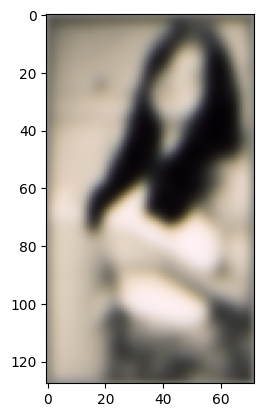

Epoch 61/100, Train_Loss: 0.02, Avg: 0.02
Epoch 62/100, Train_Loss: 0.02, Avg: 0.02
Epoch 63/100, Train_Loss: 0.02, Avg: 0.02
Epoch 64/100, Train_Loss: 0.02, Avg: 0.02
Epoch 65/100, Train_Loss: 0.02, Avg: 0.02
Epoch 66/100, Train_Loss: 0.02, Avg: 0.02
Epoch 67/100, Train_Loss: 0.02, Avg: 0.02
Epoch 68/100, Train_Loss: 0.02, Avg: 0.02
Epoch 69/100, Train_Loss: 0.02, Avg: 0.02
Epoch 70/100, Train_Loss: 0.02, Avg: 0.02


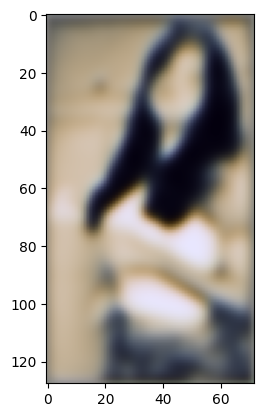

Epoch 71/100, Train_Loss: 0.02, Avg: 0.02
Epoch 72/100, Train_Loss: 0.02, Avg: 0.02
Epoch 73/100, Train_Loss: 0.02, Avg: 0.02
Epoch 74/100, Train_Loss: 0.02, Avg: 0.02
Epoch 75/100, Train_Loss: 0.02, Avg: 0.02
Epoch 76/100, Train_Loss: 0.02, Avg: 0.02
Epoch 77/100, Train_Loss: 0.02, Avg: 0.02
Epoch 78/100, Train_Loss: 0.02, Avg: 0.02
Epoch 79/100, Train_Loss: 0.02, Avg: 0.02
Epoch 80/100, Train_Loss: 0.02, Avg: 0.02


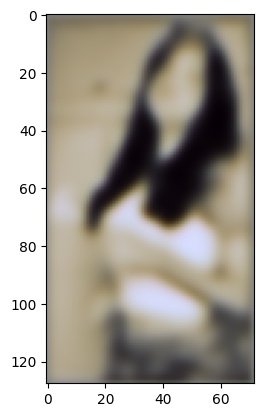

Epoch 81/100, Train_Loss: 0.02, Avg: 0.02
Epoch 82/100, Train_Loss: 0.02, Avg: 0.02
Epoch 83/100, Train_Loss: 0.01, Avg: 0.01
Epoch 84/100, Train_Loss: 0.01, Avg: 0.01
Epoch 85/100, Train_Loss: 0.01, Avg: 0.01
Epoch 86/100, Train_Loss: 0.01, Avg: 0.01
Epoch 87/100, Train_Loss: 0.01, Avg: 0.01
Epoch 88/100, Train_Loss: 0.01, Avg: 0.01
Epoch 89/100, Train_Loss: 0.01, Avg: 0.01
Epoch 90/100, Train_Loss: 0.01, Avg: 0.01


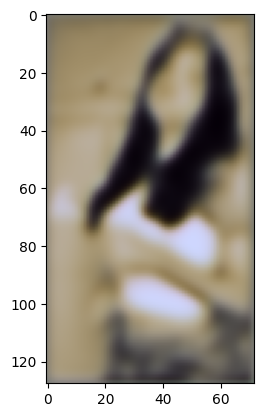

Epoch 91/100, Train_Loss: 0.01, Avg: 0.01
Epoch 92/100, Train_Loss: 0.01, Avg: 0.01
Epoch 93/100, Train_Loss: 0.01, Avg: 0.01
Epoch 94/100, Train_Loss: 0.01, Avg: 0.01
Epoch 95/100, Train_Loss: 0.01, Avg: 0.01
Epoch 96/100, Train_Loss: 0.01, Avg: 0.01
Epoch 97/100, Train_Loss: 0.01, Avg: 0.01
Epoch 98/100, Train_Loss: 0.01, Avg: 0.01
Epoch 99/100, Train_Loss: 0.01, Avg: 0.01
Epoch 100/100, Train_Loss: 0.01, Avg: 0.01


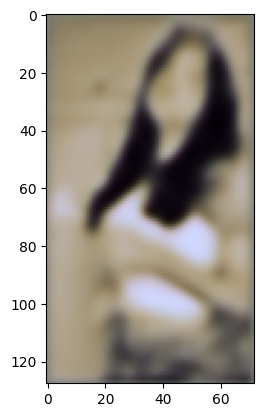

In [7]:
import sys
sys.path.append("..")
from models import ConvLSTMAutoencoder
from util.utilities import train, evaluate, get_device

model = ConvLSTMAutoencoder(hidden_dim=256//4, shrink=shrink, normalize=normalize)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total parameters: {total_params:,}")

EPOCHS = 100

train_losses = []
val_losses = []
start_time = time.time()

for epoch in range(EPOCHS):
    train_loss, avg_train_loss = train(model, train_loader, criterion, optimizer)
    #val_loss, avg_val_loss = evaluate(model, val_loader, criterion)
    
    # record the losses
    train_losses.append(avg_train_loss)
    #val_losses.append(avg_val_loss)

    # print every num times epoch only
    num = 1
    if ((epoch+1) % num == 0) or epoch == 0:
        if epoch == 0:
            time_took = (time.time() - start_time) / 60
            print(f'First epoch took {time_took:.1f} minutes.')
        print(f'Epoch {epoch+1}/{EPOCHS}, Train_Loss: {train_loss:.2f}, Avg: {avg_train_loss:.2f}')
    if ((epoch+1) % 10 == 0):
        check()